In [10]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**PART-1**

In [12]:
# 1. Load dataset
data = load_breast_cancer()

In [13]:
# 2. Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [14]:
# 3. Shape and first five rows
print(df.shape)
print(df.head())


(569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

In [15]:
# 4. Train-test split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Answer:-
 1:Knn works on distance and Decision tree is not works on distance so scaling is required for KNN but not mendatory for the Decison Tree

 2:KNN,Logistic Regression,K-means

**PART-2**

In [17]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred_lr = lr.predict(X_test_scaled)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [20]:
# Knn model
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_knn3 = knn3.predict(X_test_scaled)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn3))
print("Precision:", precision_score(y_test, y_pred_knn3))
print("Recall:", recall_score(y_test, y_pred_knn3))
print("F1 Score:", f1_score(y_test, y_pred_knn3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn3))

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
Confusion Matrix:
 [[40  3]
 [ 3 68]]


In [23]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
y_pred_knn7 = knn7.predict(X_test_scaled)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn7))
print("Precision:", precision_score(y_test, y_pred_knn7))
print("Recall:", recall_score(y_test, y_pred_knn7))
print("F1 Score:", f1_score(y_test, y_pred_knn7))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn7))

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
Confusion Matrix:
 [[40  3]
 [ 3 68]]


In [26]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_dt = dt.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
Confusion Matrix:
 [[40  3]
 [ 3 68]]


In [43]:
# Bagging Classifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [30]:
y_pred_bag = bag.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Precision:", precision_score(y_test, y_pred_bag))
print("Recall:", recall_score(y_test, y_pred_bag))
print("F1 Score:", f1_score(y_test, y_pred_bag))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))

Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
Confusion Matrix:
 [[40  3]
 [ 2 69]]


In [32]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred_rf = rf.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [40]:
# Gaussian Naive Bayes
gauss = GaussianNB()
gauss.fit(X_train, y_train)

y_pred_gauss = gauss.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gauss))
print("Precision:", precision_score(y_test, y_pred_gauss))
print("Recall:", recall_score(y_test, y_pred_gauss))
print("F1 Score:", f1_score(y_test, y_pred_gauss))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gauss))

Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862
Confusion Matrix:
 [[40  3]
 [ 0 71]]


**PART-3**

In [41]:
# Model Comparison
models = {
    "Logistic Regression": y_pred_lr,
    "KNN (K=3)": y_pred_knn3,
    "KNN (K=7)": y_pred_knn7,
    "Decision Tree": y_pred_dt,
    "Bagging DT": y_pred_bag,
    "Random Forest": y_pred_rf,
    "Naive Bayes": y_pred_gauss
}

comparison = []

for name, pred in models.items():
    comparison.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred)
    ])

df_compare = pd.DataFrame(
    comparison,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print(df_compare)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1            KNN (K=3)  0.947368   0.957746  0.957746  0.957746
2            KNN (K=7)  0.947368   0.957746  0.957746  0.957746
3        Decision Tree  0.947368   0.957746  0.957746  0.957746
4           Bagging DT  0.956140   0.958333  0.971831  0.965035
5        Random Forest  0.964912   0.958904  0.985915  0.972222
6          Naive Bayes  0.973684   0.959459  1.000000  0.979310


In [42]:
best_accuracy_model = df_compare.loc[df_compare["Accuracy"].idxmax()]
best_recall_model = df_compare.loc[df_compare["Recall"].idxmax()]

print("Best Model by Accuracy:")
print(best_accuracy_model)

print("\nBest Model by Recall (Medical Priority):")
print(best_recall_model)

Best Model by Accuracy:
Model        Logistic Regression
Accuracy                0.973684
Precision               0.972222
Recall                  0.985915
F1 Score                0.979021
Name: 0, dtype: object

Best Model by Recall (Medical Priority):
Model        Naive Bayes
Accuracy        0.973684
Precision       0.959459
Recall               1.0
F1 Score         0.97931
Name: 6, dtype: object


**PART-4**

In [36]:
# Scale data
X_scaled = scaler.fit_transform(X)

In [37]:
# Elbow Method
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

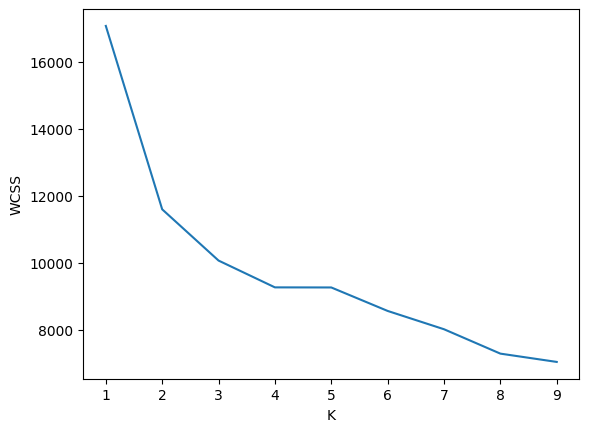

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

In [39]:
plt.plot(range(1, 10), wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

# Train with optimal K (assume K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Cluster Labels:", labels)
print("Cluster Centers:", kmeans.cluster_centers_)